# Contents
--Import df 
--Profiling based on age 
--Profiling based on income 
--Profiling based on number of dependants 
--Export df

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assigning path
path = r'C:\Users\Shruthi\Desktop\CF_Tasks\21-06-2023_Instacart_Basket_Analysis'

In [3]:
# Importing df
df_high_activity_cust = pd.read_pickle(os.path.join(path, '2. Data', 'Prepared data', 'df_high_act_cust.pkl'))

In [4]:
# Checking
df_high_activity_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,region,customer_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer


In [5]:
df_high_activity_cust.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days', 'frequency_flag',
       'Gender', 'State', 'Age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'region', 'customer_activity'],
      dtype='object')

# Profiling based on age

In [6]:
df_high_activity_cust.loc[df_high_activity_cust['Age'] >= 60,'age_flag'] = 'Senior'
df_high_activity_cust.loc[(df_high_activity_cust['Age'] >= 45) & (df_high_activity_cust['Age'] < 60), 'age_flag'] = 'Middle Age'
df_high_activity_cust.loc[(df_high_activity_cust['Age'] >= 26) & (df_high_activity_cust['Age'] < 45), 'age_flag'] = 'Adult'
df_high_activity_cust.loc[df_high_activity_cust['Age'] < 26,'age_flag'] = 'Young adult'

In [7]:
# Checking value counts
df_high_activity_cust['age_flag'].value_counts(dropna = False)

Senior         10574504
Adult           9214451
Middle Age      7311091
Young adult     3864518
Name: age_flag, dtype: int64

In [8]:
# Checking
df_high_activity_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,n_dependants,fam_status,income,region,customer_activity,age_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Adult
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Adult
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Adult
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Adult
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Adult


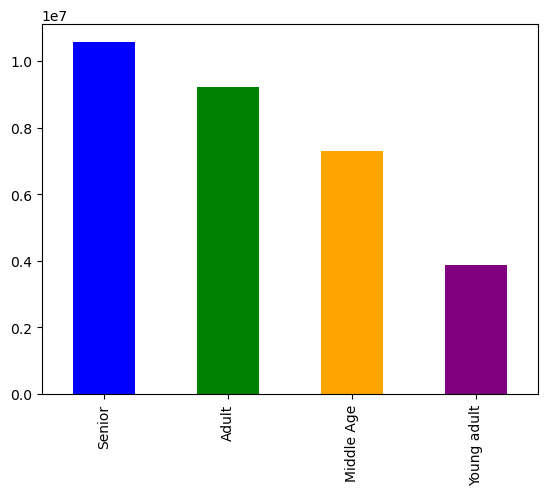

In [9]:
# Create a bar chart for 'age_flag'
bar_chart_age = df_high_activity_cust['age_flag'].value_counts().plot.bar(color=['blue', 'green', 'orange', 'purple'])

In [63]:
# Save Viz
bar_chart_age.figure.savefig(os.path.join(path, '4. Analysis','Visualizations', 'age_bar.png'), bbox_inches='tight')

In [13]:
# aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
df_high_activity_cust.groupby('age_flag').agg({'days_since_last_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_last_order                   prices                
                              max       mean  min      max       mean  min
age_flag                                                                  
Adult                        30.0  10.815262  0.0  99999.0  11.786432  1.0
Middle Age                   30.0  10.823913  0.0  99999.0  12.275494  1.0
Senior                       30.0  10.800665  0.0  99999.0  11.724449  1.0
Young adult                  30.0  10.799071  0.0  99999.0  12.209359  1.0

In [14]:
region_age=pd.crosstab(df_high_activity_cust['region'],df_high_activity_cust['age_flag'],dropna=False)

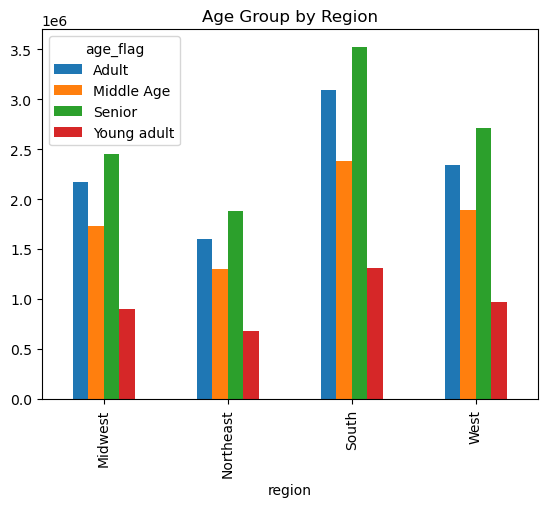

In [15]:
# create a bar chart between age and region
regions_age=region_age.plot.bar()
plt.title('Age Group by Region')
plt.show()

In [16]:
# Save Viz
regions_age.figure.savefig(os.path.join(path, '4. Analysis','Visualizations', 'regions_age.png'),bbox_inches='tight')

In [10]:
# Import departments_wrangled.csv
df_dep = pd.read_csv(os.path.join(path, '2. Data', 'Prepared data', 'departments_wrangled.csv'))

In [16]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [11]:
# Rename 'Unnamed: 0' column as 'department_id'
df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [18]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [12]:
# Merge df_dep with df_high_activity_cust
df_merged = df_high_activity_cust.merge(df_dep, on = 'department_id')

In [20]:
# Check output
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,State,Age,date_joined,n_dependants,fam_status,income,region,customer_activity,age_flag,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages


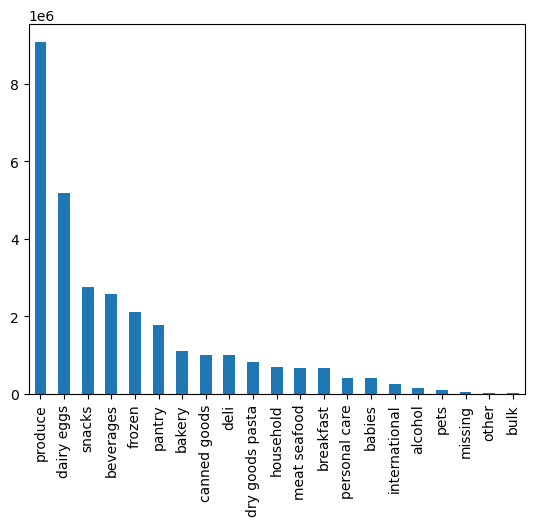

In [14]:
department_bar = df_merged['department'].value_counts().plot.bar()

In [15]:
# Export bar chart
department_bar.figure.savefig(os.path.join(path, '4. Analysis', 'Visualizations', 'department_bar'),bbox_inches='tight')

In [16]:
# Create crosstab between age and departments
crosstab_age_departments = pd.crosstab(df_merged['department'], df_merged['age_flag'], dropna = False)

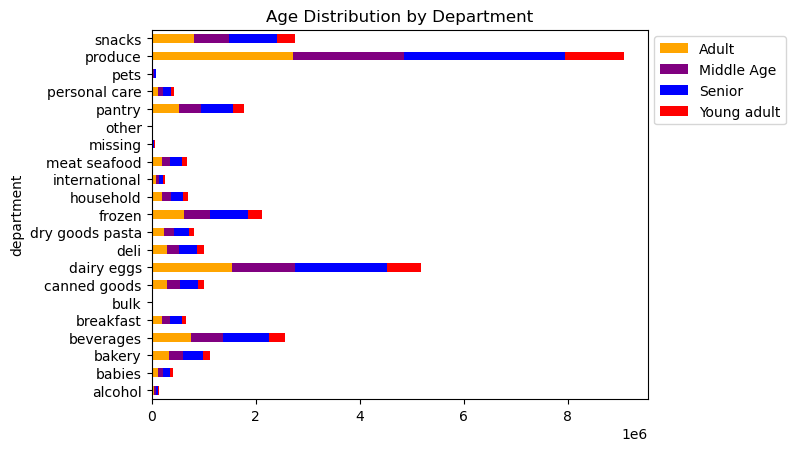

In [17]:
# Create a stacked bar chart
stacked_bar_age_department = crosstab_age_departments.plot.barh(stacked = True, title = 'Age Distribution by Department', color = {'Young adult': 'red', 'Adult': 'orange', 'Middle Age': 'purple', 'Senior': 'blue'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [19]:
# Export stacked bar chart
stacked_bar_age_department.figure.savefig(os.path.join(path, '4. Analysis', 'Visualizations', 'stacked_bar_age_department'),bbox_inches='tight')

# Profiling based on income

In [20]:
# Create income_flag
df_merged.loc[df_merged['income'] <= 50000, 'income_flag'] = 'Low income'
df_merged.loc[(df_merged['income'] >50000) & (df_merged['income'] <= 150000), 'income_flag'] = 'Middle income'
df_merged.loc[df_merged['income'] > 150000, 'income_flag'] = 'High income'

In [33]:
# Check value counts
df_merged['income_flag'].value_counts(dropna = False)

Middle income    23707476
High income       3894534
Low income        3362554
Name: income_flag, dtype: int64

In [34]:
# Check output
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,Age,date_joined,n_dependants,fam_status,income,region,customer_activity,age_flag,department,income_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages,Low income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages,Low income
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages,Low income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages,Low income
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages,Low income


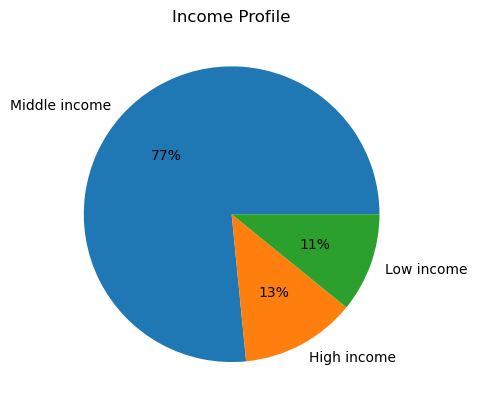

In [35]:
# Create a pie chart for 'income_flag'
pie_chart_income = df_merged['income_flag'].value_counts().plot.pie(title = 'Income Profile', label = '', autopct = ('%1.f%%'))

In [36]:
# Export pie chart
pie_chart_income.figure.savefig(os.path.join(path, '4. Analysis', 'Visualizations', 'pie_chart_income_profile'))

In [37]:
# Finding aggregate
income_agg = df_merged.groupby('income_flag').agg({'days_since_last_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean', 'sum']})

In [38]:
income_agg

days_since_last_order                  prices           \
                                min   max       mean    min      max   
income_flag                                                            
High income                     0.0  30.0  10.684293    1.0  99999.0   
Low income                      0.0  30.0  11.175808    1.0     25.0   
Middle income                   0.0  30.0  10.779429    1.0  99999.0   

                                       
                    mean          sum  
income_flag                            
High income    32.620080  127040012.2  
Low income      6.707347   22553818.0  
Middle income   9.276502  219922451.4

In [21]:
# Create crosstab between income and region
crosstab_income_region = pd.crosstab(df_merged['region'], df_merged['income_flag'], dropna = False)

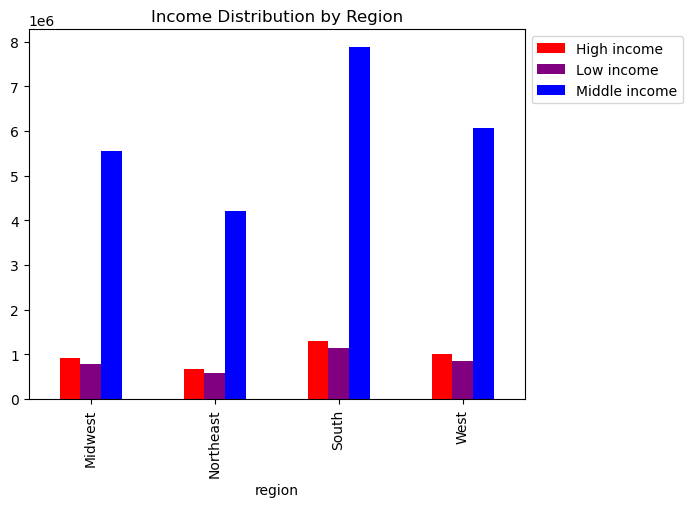

In [22]:
# Create a bar chart
bar_income_region = crosstab_income_region.plot.bar(title = 'Income Distribution by Region', color = {'Low income': 'purple', 'Middle income': 'blue', 'High income': 'red'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [23]:
# Export bar graph
bar_income_region.figure.savefig(os.path.join(path, '4. Analysis', 'Visualizations', 'bar_income_region'), bbox_inches='tight')

In [24]:
# Create crosstab between income and departments
crosstab_income_departments = pd.crosstab(df_merged['department'], df_merged['income_flag'], dropna = False)

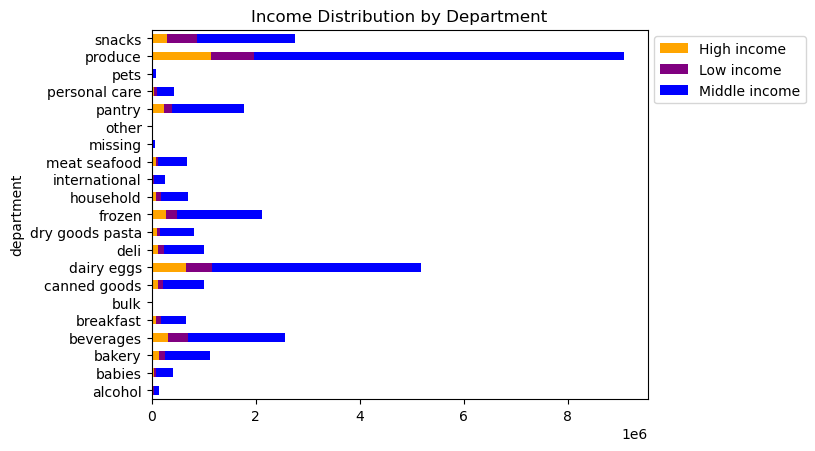

In [25]:
# Create a stacked bar chart
stacked_bar_income_department = crosstab_income_departments.plot.barh(stacked = True, title = 'Income Distribution by Department', color = {'Low income': 'purple', 'Middle income': 'blue', 'High income': 'orange'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [26]:
# Export stacked bar chart
stacked_bar_income_department.figure.savefig(os.path.join(path, '4. Analysis', 'Visualizations', 'stacked_bar_income_department'),bbox_inches='tight')

# Profiling based on departments

In [27]:
# Create role_flag
df_merged.loc[df_merged['n_dependants'] == 0, 'role_flag'] = 'Individual'
df_merged.loc[df_merged['n_dependants'] != 0, 'role_flag'] = 'Caregiver'

In [47]:
# Check value counts
df_merged['role_flag'].value_counts(dropna = False)

Caregiver     23224883
Individual     7739681
Name: role_flag, dtype: int64

In [48]:
# Check output
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,fam_status,income,region,customer_activity,age_flag,department,income_flag,role_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages,Low income,Caregiver
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages,Low income,Caregiver
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages,Low income,Caregiver
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages,Low income,Caregiver
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages,Low income,Caregiver


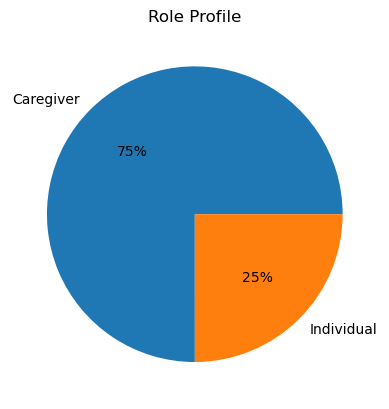

In [49]:
# Create a pie chart for 'role_flag'
pie_chart_role = df_merged['role_flag'].value_counts().plot.pie(title = 'Role Profile', label = '', autopct = ('%1.f%%'))

In [50]:
# Export pie chart
pie_chart_role.figure.savefig(os.path.join(path, '4. Analysis', 'Visualizations', 'pie_chart_role_profile'))

In [52]:
# Finding agg
role_agg = df_merged.groupby('role_flag').agg({'days_since_last_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean', 'sum']})

In [53]:
role_agg

days_since_last_order                  prices                      \
                             min   max       mean    min      max       mean   
role_flag                                                                      
Caregiver                    0.0  30.0  10.816416    1.0  99999.0  11.877157   
Individual                   0.0  30.0  10.791951    1.0  99999.0  12.102657   

                         
                    sum  
role_flag                
Caregiver   275845575.9  
Individual   93670705.7

In [28]:
# Create crosstab between role and region
crosstab_role_region = pd.crosstab(df_merged['region'], df_merged['role_flag'], dropna = False)

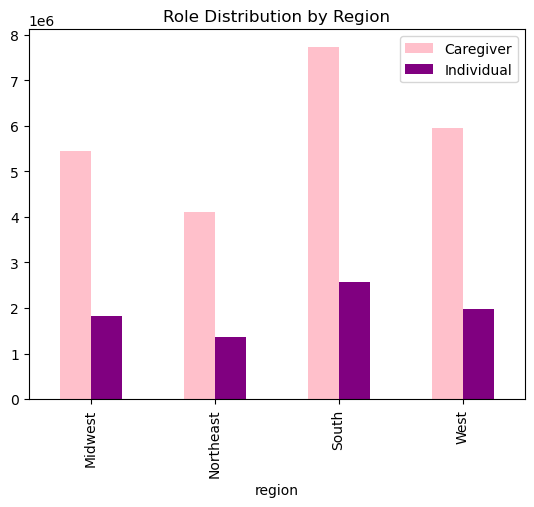

In [29]:
# Create a bar chart
bar_role_region = crosstab_role_region.plot.bar(title = 'Role Distribution by Region', color = {'Caregiver': 'pink', 'Individual': 'purple'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [30]:
# Export bar graph
bar_role_region.figure.savefig(os.path.join(path, '4. Analysis', 'Visualizations', 'bar_role_region'), bbox_inches='tight')

In [31]:
# Create crosstab between role and departments
crosstab_role_departments = pd.crosstab(df_merged['department'], df_merged['role_flag'], dropna = False)

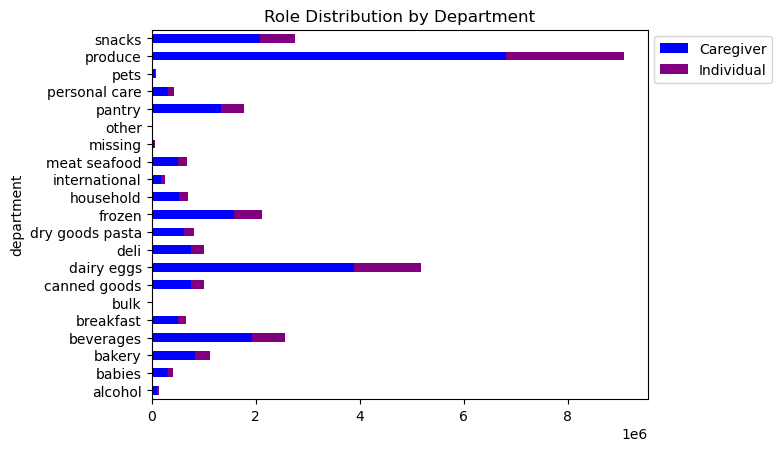

In [32]:
# Create a stacked bar chart
stacked_bar_role_department = crosstab_role_departments.plot.barh(stacked = True, title = 'Role Distribution by Department', color = {'Caregiver': 'blue', 'Individual': 'purple'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [33]:
# Export stacked bar chart
stacked_bar_role_department.figure.savefig(os.path.join(path, '4. Analysis', 'Visualizations', 'stacked_bar_role_department'),bbox_inches='tight')

# Exporting df

In [60]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 30964563
Data columns (total 37 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                int64   
 2   order_number           int64   
 3   orders_day_of_week     int64   
 4   order_hour_of_day      int64   
 5   days_since_last_order  float64 
 6   product_id             int64   
 7   add_to_cart_order      int64   
 8   reordered              int64   
 9   product_name           object  
 10  aisle_id               int64   
 11  department_id          int64   
 12  prices                 float64 
 13  _merge                 category
 14  price_range_loc        object  
 15  busiest_day            object  
 16  busiest_days           object  
 17  busiest_period_of_day  object  
 18  max_order              int64   
 19  loyalty_flag           object  
 20  mean_price             float64 
 21  spending_flag          object

In [61]:
df_merged.to_pickle(os.path.join(path, '2. Data', 'Prepared data', 'df_merged_final.pkl'))